In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d = pd.read_csv('./kaggle/TaxInfo.csv')

In [3]:
# layout 
sns.set(rc={'figure.figsize':(12,12)})
sns.set(color_codes=True)
# label encoding 
from sklearn.preprocessing import LabelEncoder

# data splitting
from sklearn.model_selection import train_test_split

# accuracy checking
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# random forest
from sklearn.ensemble import RandomForestClassifier

In [4]:
d.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,1,49685,227187,0,0,105,0,1,1,1,Democrat
1,2,64756,-507342,2,3,68,3,1,0,0,Independent
2,3,115435,521290,1,3,81,2,0,1,0,Republican
3,4,99454,251829,2,1,52,4,1,0,0,Republican
4,5,157274,-472337,0,1,28,1,1,0,1,Independent


In [5]:
d.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
d.columns

Index(['HHI', 'HHDL', 'Married', 'CollegGrads', 'AHHAge', 'Cars',
       'Filed in 2017', 'Filed in 2016', 'Filed in 2015', 'PoliticalParty'],
      dtype='object')

In [7]:
d.describe()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.00000
mean,153524.522908,-6666.766932,0.970120,2.595618,60.577689,2.447211,0.507968,0.512948,0.50996
std,86167.778113,593751.687936,0.806939,1.687388,24.847991,1.701621,0.500186,0.500081,0.50015
min,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.00000
25%,82788.500000,-514295.500000,0.000000,1.000000,39.000000,1.000000,0.000000,0.000000,0.00000
50%,153788.500000,-11331.500000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.00000
75%,228034.000000,526141.250000,2.000000,4.000000,81.000000,4.000000,1.000000,1.000000,1.00000
max,299700.000000,999628.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.00000


In [8]:
le = LabelEncoder()
d['PoliticalParty'] = le.fit_transform(d['PoliticalParty'])

In [9]:
d.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,49685,227187,0,0,105,0,1,1,1,0
1,64756,-507342,2,3,68,3,1,0,0,1
2,115435,521290,1,3,81,2,0,1,0,2
3,99454,251829,2,1,52,4,1,0,0,2
4,157274,-472337,0,1,28,1,1,0,1,1


# Features Correlation

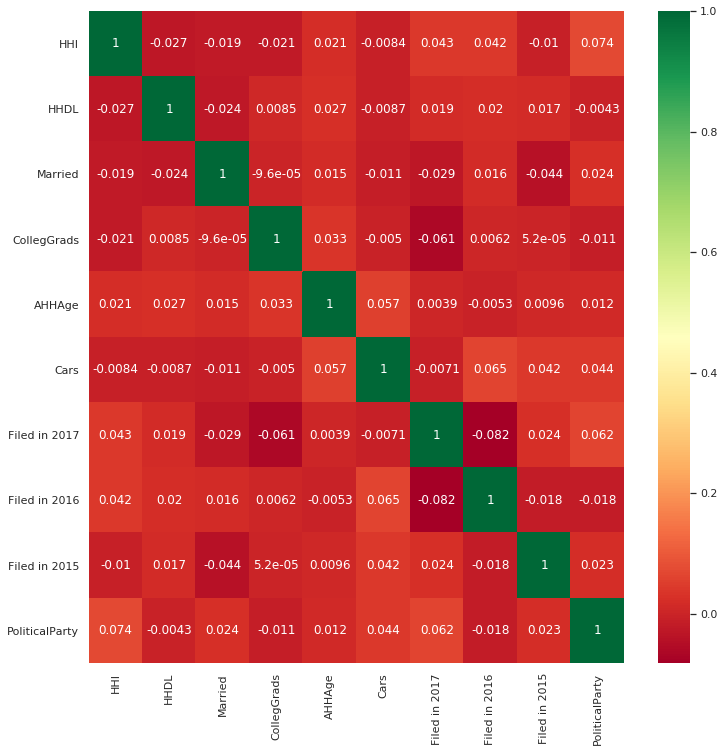

In [10]:
corr = d.corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn')

In [11]:
#Preparing data for model

In [12]:
y = d['PoliticalParty']
X = d.drop('PoliticalParty',axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)

In [63]:
print(X_train.shape,X_test.shape)

(993, 9) (11, 9)


# Random Forest Classifier

In [64]:
clf = RandomForestClassifier(n_estimators=40)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [65]:
pred = clf.predict(X_test)

# Accuracy Checking

In [66]:
accuracy_score(y_test,pred)

0.8181818181818182

In [67]:
confusion_matrix(y_test, pred)

array([[2, 1, 0],
       [0, 5, 0],
       [1, 0, 2]])

In [68]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3

    accuracy                           0.82        11
   macro avg       0.83      0.78      0.79        11
weighted avg       0.83      0.82      0.81        11



# Important Features needed to predict the party a tax payer belongs to

In [69]:
clf.feature_importances_

array([0.21592026, 0.22766384, 0.05545613, 0.09940949, 0.20233063,
       0.09678753, 0.03235173, 0.03490591, 0.03517448])

In [70]:
features = X.columns

In [71]:
feature_importance = clf.feature_importances_

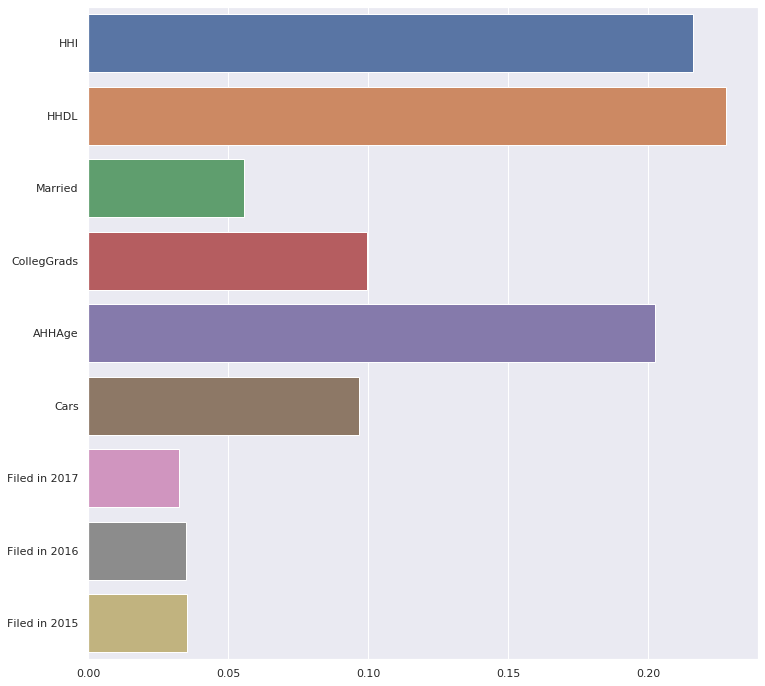

In [72]:
sns.barplot(x=feature_importance, y=features)